# Load MNIST Data 

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
import pandas as pd 
d0=pd.read_csv('gdrive/My Drive/Colab Notebooks/TSNE/CHAPTER-15 T-SNE/train.csv')
print(d0.head(5)) 

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [0]:
# MNIST dataset downloaded from Kaggle : 
#https://www.kaggle.com/c/digit-recognizer/data

# Functions to read and show images.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


   
# d0 = pd.read_csv('./mnist_train.csv')

# print(d0.head(5)) # print first five rows of d0.

# save the labels into a variable l.
l = d0['label']

# Drop the label feature and store the pixel data in d.
d = d0.drop("label",axis=1)

    
        


In [6]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


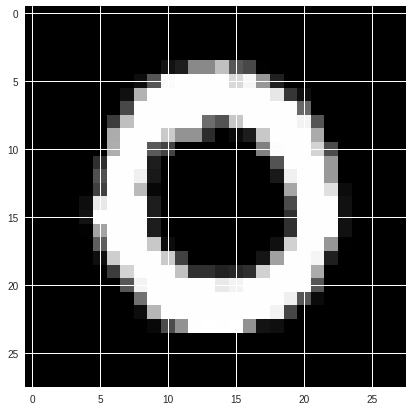

0


In [7]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 1

grid_data = d.iloc[idx].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

# t-SNE using Scikit-Learn

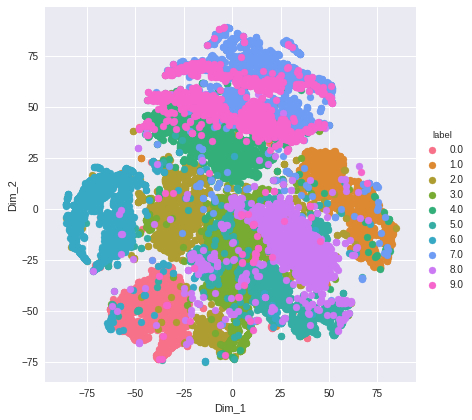

In [19]:
# TSNE

from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_1000 = standardized_data[0:42000,:]
labels_1000 = labels[0:42000]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

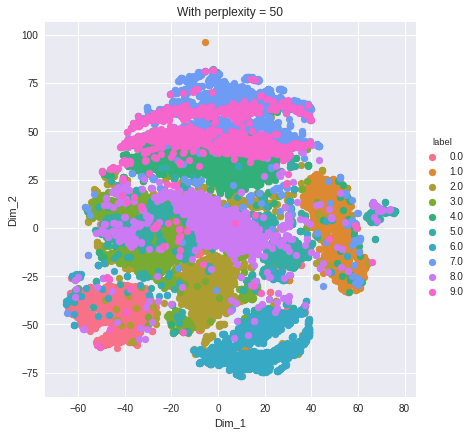

In [20]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

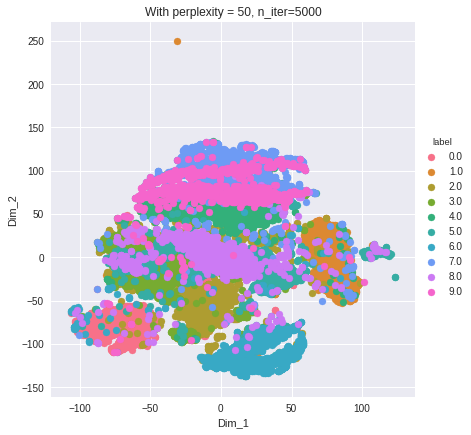

In [21]:
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

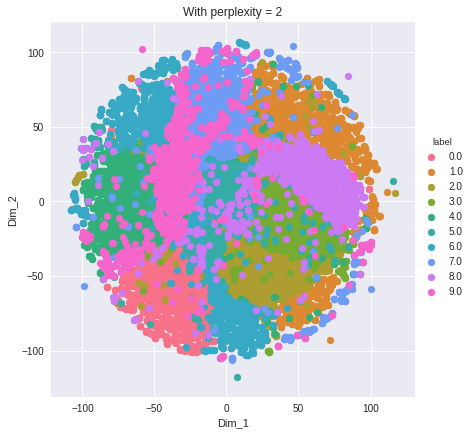

In [22]:
model = TSNE(n_components=2, random_state=0, perplexity=2)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 2')
plt.show()

In [0]:
#Excercise: Run the same analysis using 42K points with various 
#values of perplexity and iterations.

# If you use all of the points, you can expect plots like this blog below:
# http://colah.github.io/posts/2014-10-Visualizing-MNIST/